In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = './output/'

In [26]:
def read_results(dir):
    files = os.listdir(f'{path}{dir}')
    dfs = pd.DataFrame()
    for f in files:
        execution = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f'{path}{dir}/{files[0]}')
        df['execution'] = [execution]*df.shape[0]
        dfs = pd.concat([dfs, df], ignore_index=True)
    return dfs

In [27]:
df_ml_1m = read_results('ml-1m')

In [28]:
df_gb = df_ml_1m.groupby('Epoch').mean()

In [29]:
pinterest = read_results('pinterest-20')

In [30]:
pin_gb = pinterest.groupby('Epoch').mean()

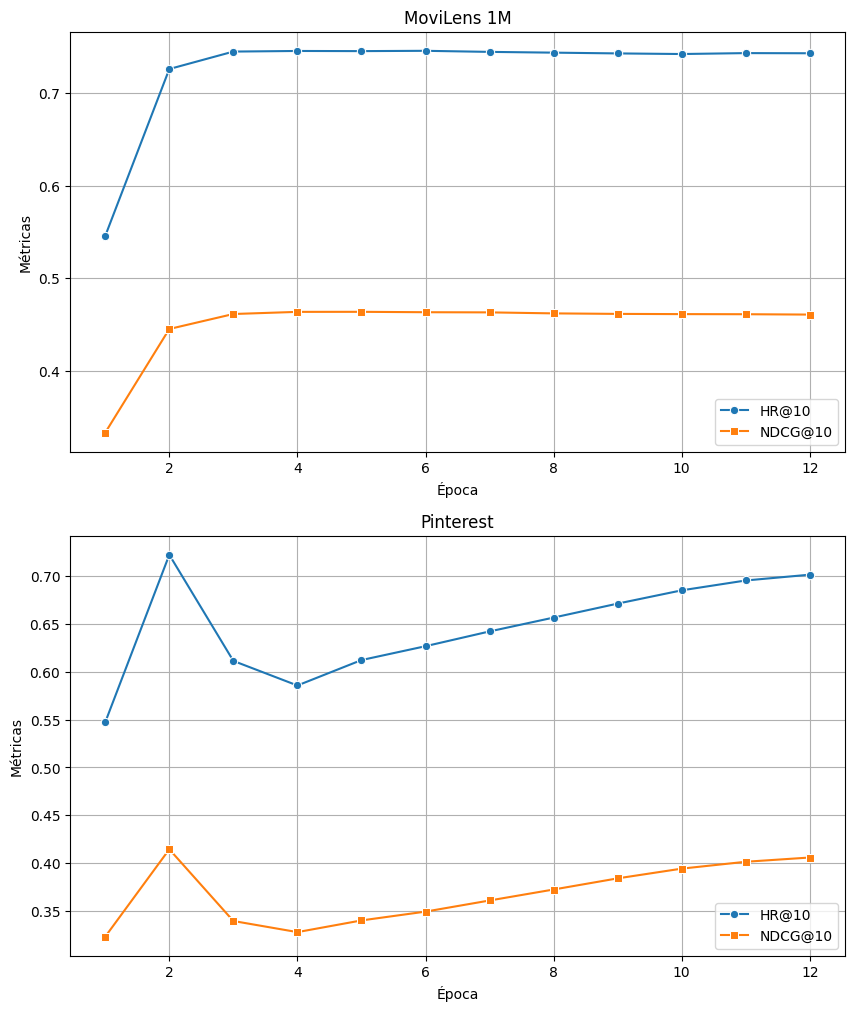

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
sns.lineplot(data=df_gb, x='Epoch', y='HR@10',
             marker='o', label='HR@10', ax=axs[0])
sns.lineplot(data=df_gb, x='Epoch', y='NDCG@10',
             marker='s', label='NDCG@10', ax=axs[0])
axs[0].set_title('MoviLens 1M')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Métricas')
axs[0].legend()
axs[0].grid(True)
sns.lineplot(data=pin_gb, x='Epoch', y='HR@10',
             marker='o', label='HR@10', ax=axs[1])
sns.lineplot(data=pin_gb, x='Epoch', y='NDCG@10',
             marker='s', label='NDCG@10', ax=axs[1])
axs[1].set_title('Pinterest')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Métricas')
axs[1].legend()
axs[1].grid(True)

In [35]:
df_ml_1m[df_ml_1m['Epoch'] == 12]['HR@10'].mean()

np.float64(0.7433774834437086)

In [36]:
df_ml_1m[df_ml_1m['Epoch'] == 12]['NDCG@10'].mean()

np.float64(0.4605630735427634)

In [38]:
pinterest[pinterest['Epoch'] == 12]['NDCG@10'].mean()

np.float64(0.4059012914237928)

In [39]:
pinterest[pinterest['Epoch'] == 12]['HR@10'].mean()

np.float64(0.7013970681501078)

In [32]:
ml_time_all = df_ml_1m.Time.sum()
mf_time_1_exec = df_ml_1m.groupby('execution').Time.sum().mean()
mf_mean_epoch = df_ml_1m.Time.mean()

In [33]:
ml_time_all, mf_time_1_exec, mf_mean_epoch

(np.float64(11982.01139),
 np.float64(1198.2011390000002),
 np.float64(99.85009491666666))

In [34]:
pinterest_time_all = pinterest.Time.sum()
pinterest_time_1_exec = pinterest.groupby('execution').Time.sum().mean()
pinterest_mean_epoch = pinterest.Time.mean()
pinterest_time_all, pinterest_time_1_exec, pinterest_mean_epoch

(np.float64(17183.59983),
 np.float64(1909.2888699999999),
 np.float64(159.10740583333333))

In [17]:
def read_results_grid_search(dir):
    files = os.listdir(f'{path}{dir}')
    dfs = pd.DataFrame()
    count = 1
    for f in files:
        df = pd.read_csv(f'{path}{dir}{f}')
        if df.shape[0] > 8:
            df = df[:8]
        df['execution'] = [count]*df.shape[0]
        dfs = pd.concat([dfs, df], ignore_index=True)
        count += 1
    return dfs

In [18]:
dfs_grid_search = read_results_grid_search('grid_search/last_fm/')

In [23]:
last_epoch = dfs_grid_search[dfs_grid_search['Epoch']
                             == 8].sort_values('NDCG@10', ascending=False)

In [33]:
last_epoch.head()

,Epoch,HR@10,NDCG@10,Time,unb_weight,embed_dim,reg,execution
7,8,1.0,0.993968,196.685597,0.030,256,0.0003,1
479,8,1.0,0.992704,201.263535,0.100,256,0.0003,60
295,8,1.0,0.991062,191.449362,0.030,256,0.0010,37
71,8,1.0,0.989860,203.499570,0.003,256,0.0010,9
255,8,1.0,0.989177,203.331352,0.100,256,0.0010,32


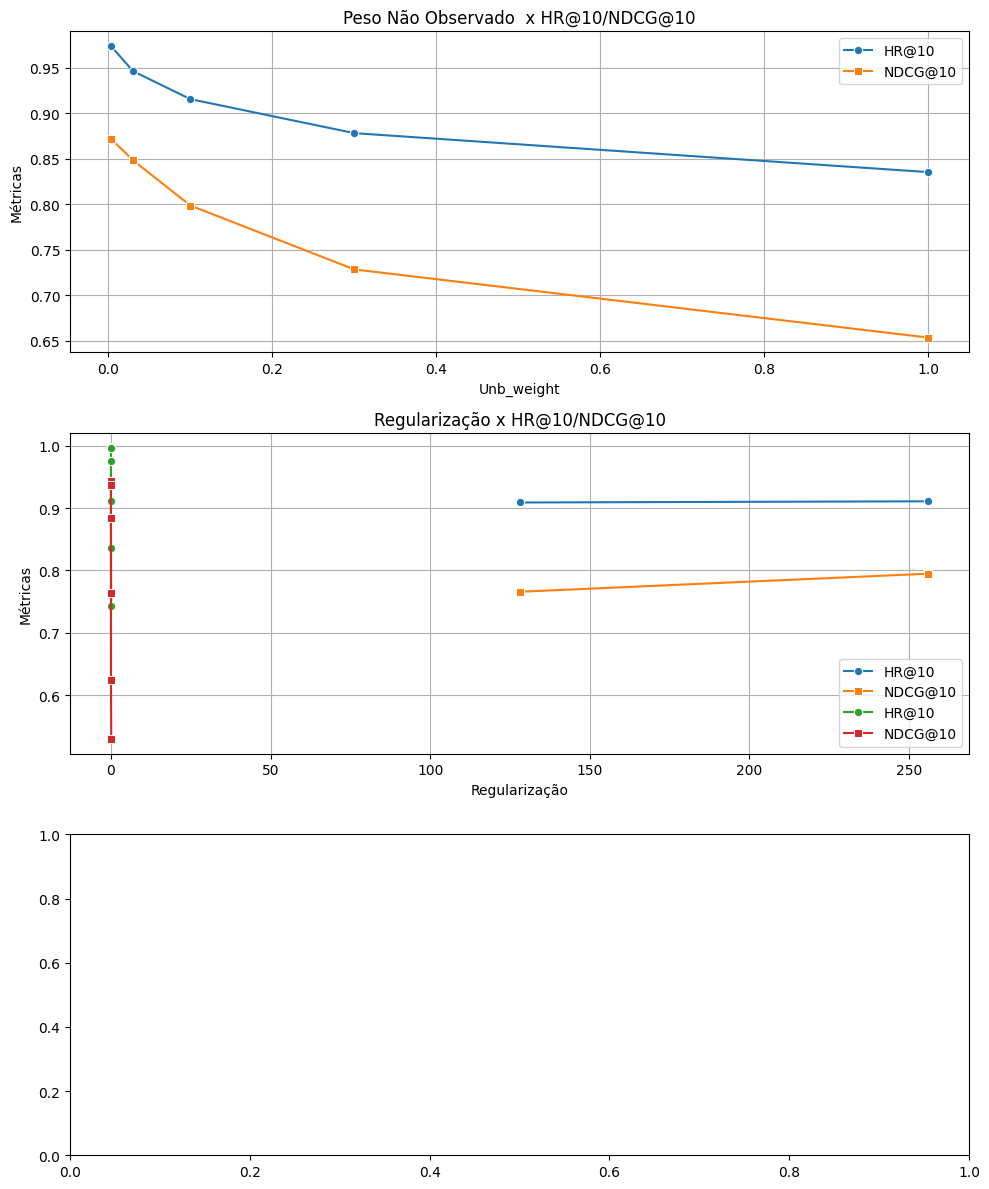

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

sns.lineplot(data=last_epoch, x='unb_weight', y='HR@10',
             marker='o', label='HR@10', ax=axs[0], errorbar=None)
sns.lineplot(data=last_epoch, x='unb_weight', y='NDCG@10',
             marker='s', label='NDCG@10', ax=axs[0], errorbar=None)
axs[0].set_title('Peso Não Observado  x HR@10/NDCG@10')
axs[0].set_xlabel('Unb_weight')
axs[0].set_ylabel('Métricas')
axs[0].legend()
axs[0].grid(True)
sns.lineplot(data=last_epoch, x='embed_dim', y='HR@10',
             marker='o', label='HR@10', ax=axs[1], errorbar=None)
sns.lineplot(data=last_epoch, x='embed_dim', y='NDCG@10',
             marker='s', label='NDCG@10', ax=axs[1], errorbar=None)
axs[1].set_title('Dimensão do Embedding x HR@10/NDCG@10')
axs[1].set_xlabel('Dimensão do Embedding')
axs[1].set_ylabel('Métricas')
axs[1].legend()
axs[1].grid(True)
sns.lineplot(data=last_epoch, x='reg', y='HR@10',
             marker='o', label='HR@10', ax=axs[1], errorbar=None)
sns.lineplot(data=last_epoch, x='reg', y='NDCG@10',
             marker='s', label='NDCG@10', ax=axs[1], errorbar=None)
axs[1].set_title('Regularização x HR@10/NDCG@10')
axs[1].set_xlabel('Regularização')
axs[1].set_ylabel('Métricas')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()